In [1]:
# part 1 
# basic definition 

import networkx as nx 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json 
import pickle

from pyvis.network import Network
from PyQt5.QtCore import QDateTime, Qt, QTimer
from PyQt5.QtWidgets import (QApplication, QCheckBox, QComboBox, QDateTimeEdit,
        QDial, QDialog, QGridLayout, QGroupBox, QHBoxLayout, QLabel, QLineEdit,
        QProgressBar, QPushButton, QRadioButton, QScrollBar, QSizePolicy,
        QSlider, QSpinBox, QStyleFactory, QTableWidget, QTabWidget, QTextEdit,
        QVBoxLayout, QWidget, QToolTip, QTableWidget, QTableWidgetItem)
from PyQt5.QtGui import QIcon, QPixmap
from PyQt5.QtGui import QFont

In [2]:
# part 2
# import the data pickle version

# import from the database
f = open('database/curiosity.p','rb')
mydict = pickle.load(f)
f.close()

# divde the node and link 
[dic_node, dic_link] = mydict

# build the networkx version of the database 
Q = nx.Graph() # for networkx 
N = nx.Graph() # for html building by 

# set the color map 
color_map = []
title_name = []

# add nodes into the graph
(row, col) = dic_node.shape
for index in range(row):
    nd_id = dic_node.iloc[index]['id']
    nd_content = dic_node.iloc[index]['content']
    nd_feature = dic_node.iloc[index]['feature']
    nd_label = dic_node.iloc[index]['label']
    nd_reference = dic_node.iloc[index]['reference']
    Q.add_node(nd_id,feature=nd_feature,content=nd_content,label=nd_label,reference=nd_reference)
    N.add_node(nd_label,feature=nd_feature,content=nd_content,reference=nd_reference)
    
    # build the color map 
    if nd_feature == 'Central question':
        color_map.append('orange')
        title_name = nd_label
    elif nd_feature == 'Question':
        color_map.append('green')
    else:
        color_map.append('blue')
    
# add links into the graph
(row, col) = dic_link.shape
for index in range(row):
    lk_id = dic_link.iloc[index]['id']
    lk_from = dic_link.iloc[index]['start']
    lk_to = dic_link.iloc[index]['end']
    lk_label = dic_link.iloc[index]['label']
    Q.add_edge(lk_from,lk_to,label=lk_label,id_lk=lk_id)
    
# #     index_from = dic_node.index[dic_node['id']==lk_from].tolist()
#     index_from = dic_link[dic_link['id']==lk_from].index.values.astype(int)
# #     index_from = int(index_from)
#     lk_from_n = dic_node.iloc[index_from]['label']
# #     index_to = dic_node.index[dic_node['id']==lk_to].tolist()
#     index_to = dic_link[dic_link['id']==lk_to].index.values
# #     index_to = int(index_to)
#     lk_to_n = dic_node.iloc[index_to]['label']
    lk_from_n = dic_node.loc[dic_node['id']==lk_from,'label'].values[0]
    lk_to_n = dic_node.loc[dic_node['id']==lk_to,'label'].values[0]
    
    N.add_edge(lk_from_n,lk_to_n,label=lk_label)

d:\anaconda\envs\question\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


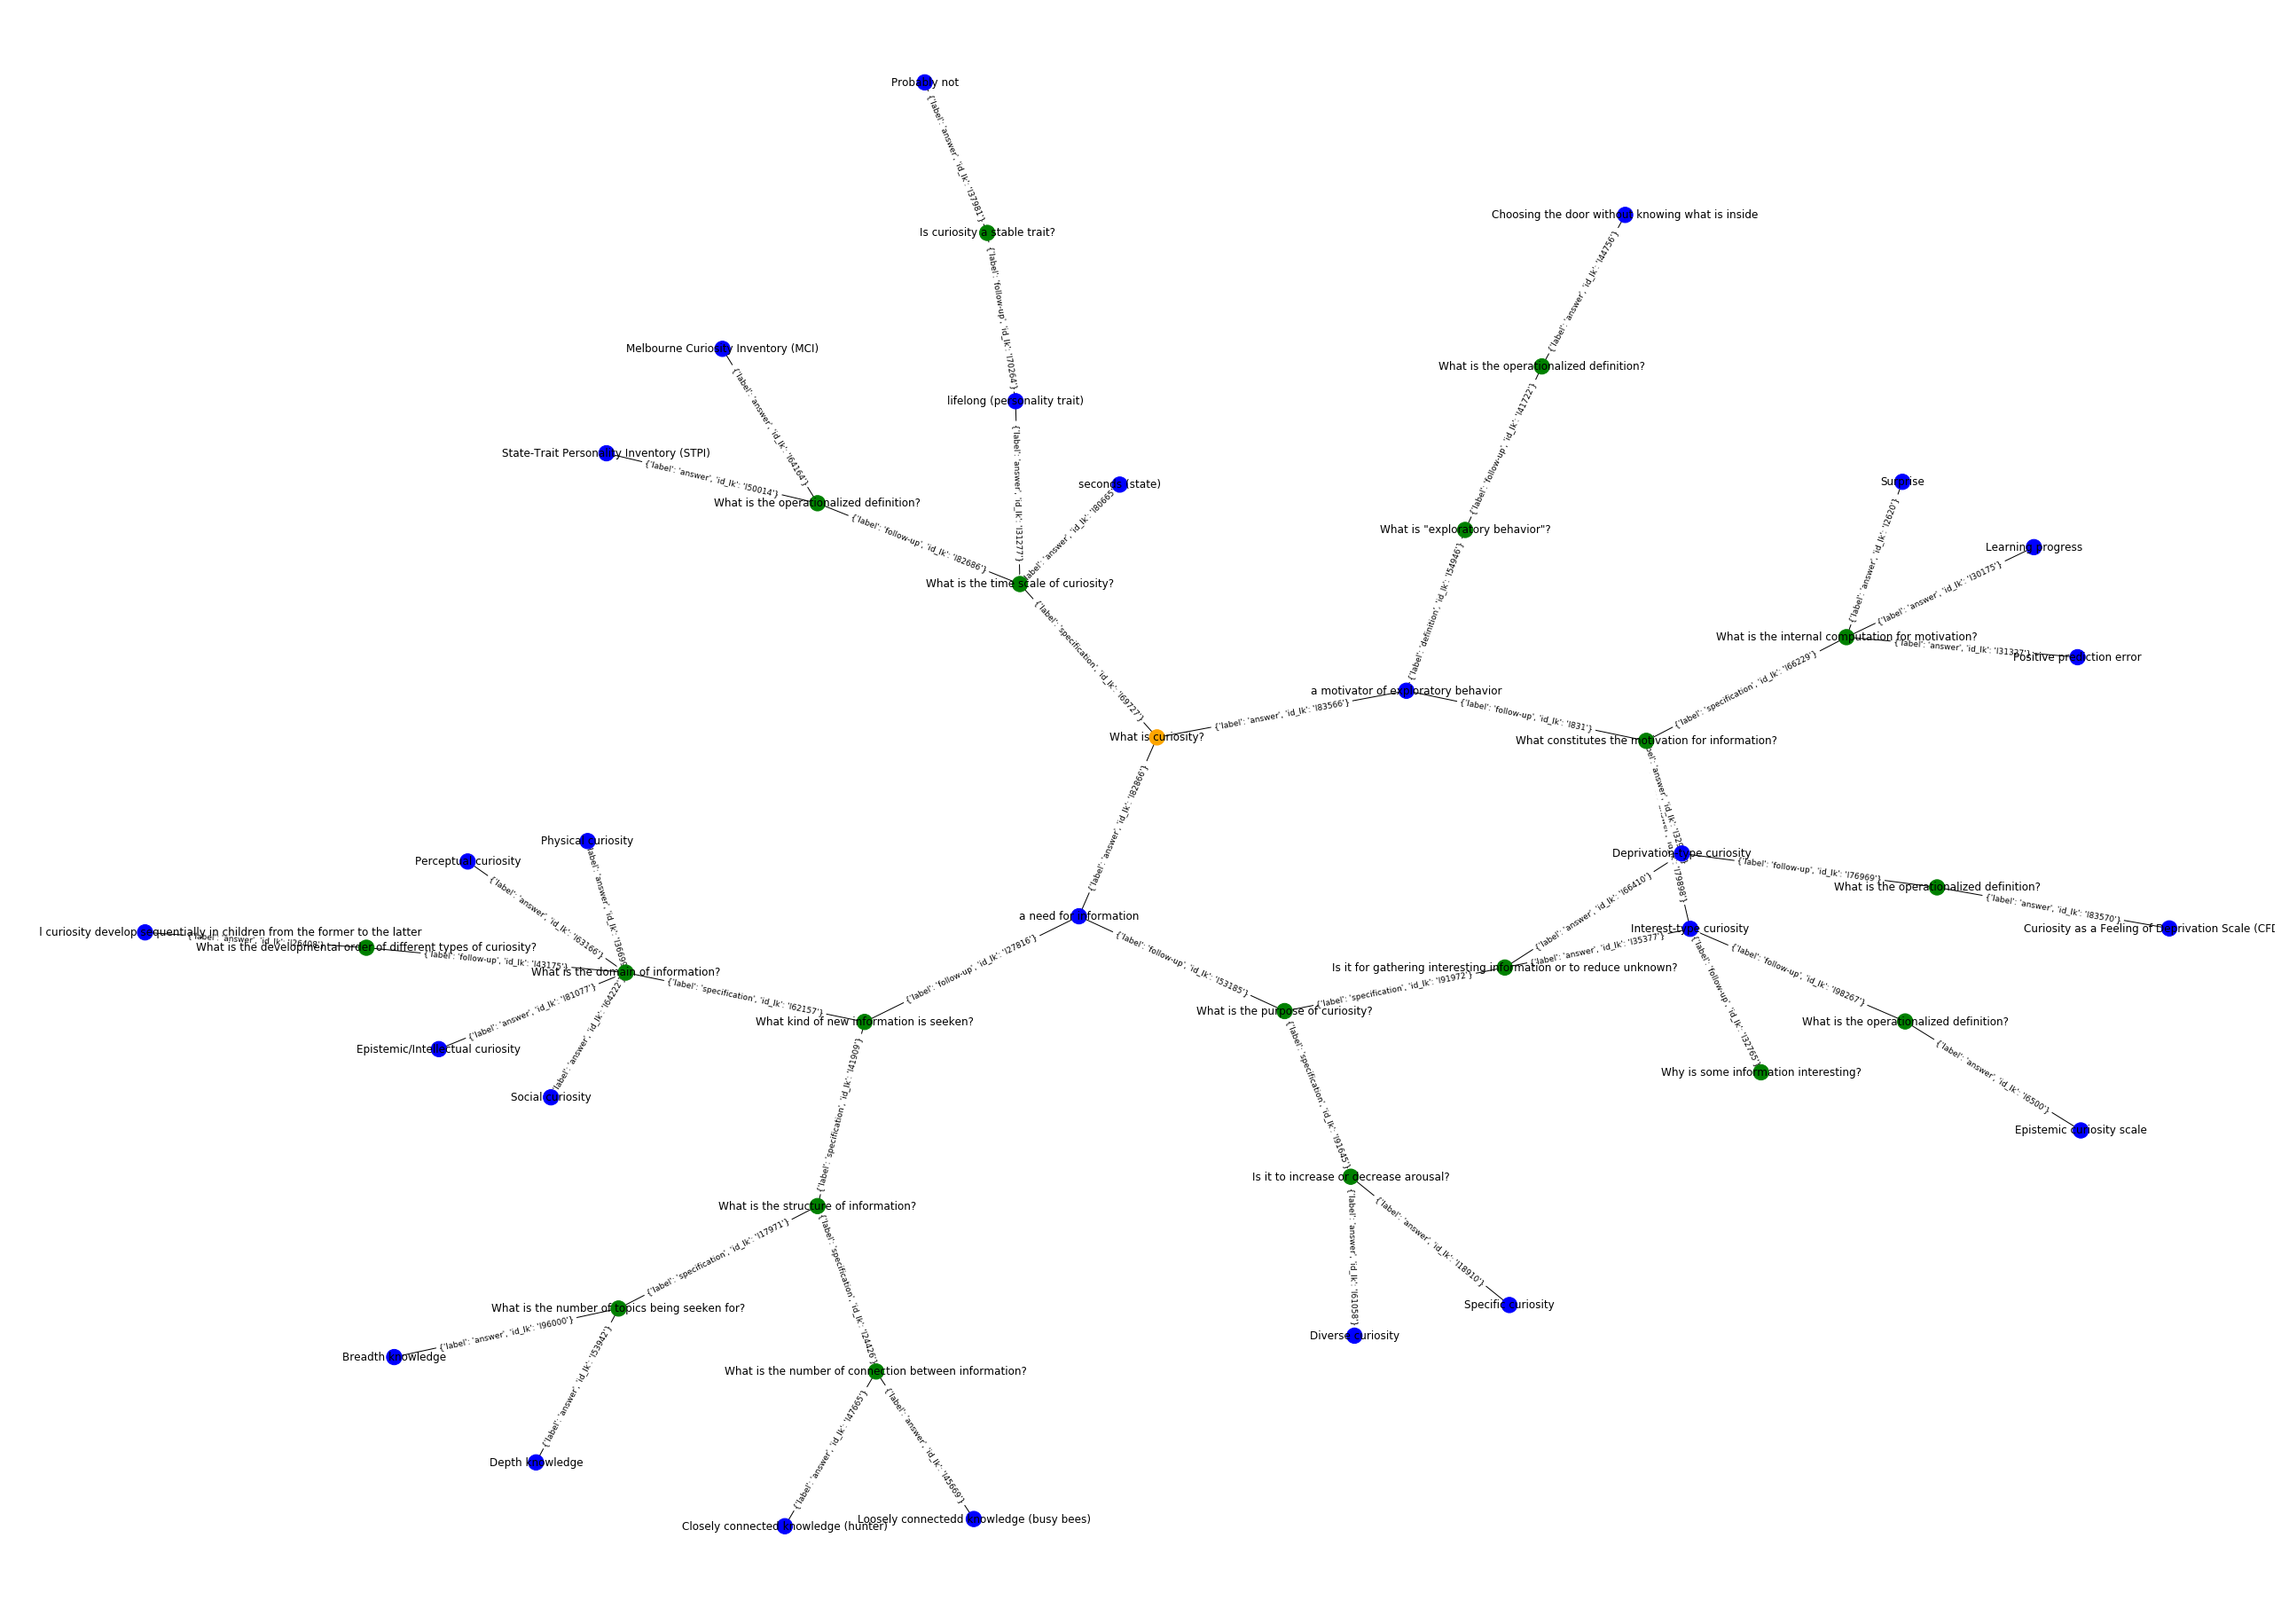

In [3]:
# part 3
# save the networkx as graph and html 

fig = plt.figure(frameon=False)
fig.set_size_inches(35, 25) 
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

pos = nx.kamada_kawai_layout(Q)

nx.draw_networkx(Q,pos,node_color=color_map,arrows=True,arrowstyle='->',arrowsize=25,with_labels=False)
node_labels = nx.get_node_attributes(Q,'label')
# nx.draw_networkx_labels(Q,pos,labels=node_labels,font_size = 24)
edge_labels = nx.get_edge_attributes(Q,'label')
# nx.draw_networkx_edge_labels(Q, pos, labels = edge_labels,font_size = 12)
# nx.draw(Q,with_labels = True,font_weight = 'bold',node_size = 1000,node_color='green',node_shape='h')

# save and illustration
# fig.savefig('QuestionNet8.png', dpi=100)
# plt.show()

title_name = title_name.replace('?','')
simple = 'QN_simple_' + title_name + '.png'
fig.savefig(simple, dpi=100)
        
# draw the full graph
nx.draw_networkx_labels(Q,pos,labels=node_labels,font_size = 12)
nx.draw_networkx_edge_labels(Q, pos, labels = edge_labels,font_size = 9)
        
full = 'QN_full_'+ title_name +'.png'
fig.savefig(full, dpi=100)
plt.show()

# generate the html version of the graph
g = Network(height="100%", width="100%", bgcolor="#222222", font_color="white")

g.from_nx(N)
g.toggle_drag_nodes(True)
# g.toggle_stabilization(True)
g.toggle_hide_edges_on_drag(False)
g.toggle_hide_nodes_on_drag(True)
g.toggle_physics(True)
g.toggle_stabilization(False)
# EdgeOptions.toggle_smoothness(smooth_type = 'curvedCCW')
g.barnes_hut(gravity=-8000,central_gravity=0.3,spring_length=100,spring_strength=0.001,damping=0.09,overlap=0)
# g.force_atlas_2based(gravity=-50,central_gravity=0.01,spring_length=100,spring_strength=0.08,damping=0.4,overlap=0)
# g.hrepulsion(node_distance=120,central_gravity=0.0,spring_length=100,spring_strength=0.01,damping=0.09)
html = 'QN_html_'+title_name+'.html'
g.show(html)

# generate gephi compatible gexf version of graph
nx.write_gexf(Q,'QN.gexf')